In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from util import run_model, visualize_sample
from GNNFakeNews.utils.helpers.hyperparameter_factory import HparamFactory
from GNNFakeNews.utils.helpers.gnn_model_explainer import  GNNModelExplainer
from GNNFakeNews.utils.enums import GNNModelTypeEnum, GNNFeatureTypeEnum, GNNDatasetTypeEnum

In [3]:
model_type = GNNModelTypeEnum.SAGE_GNN

In [4]:
model, dataset_manager = run_model(model_type, hparams=HparamFactory(model_type=model_type, dataset=GNNDatasetTypeEnum.GOSSIPCOP))

#################################
-----> The hyperparameters are set!
model_type = GNNModelTypeEnum.SAGE_GNN
dataset = GNNDatasetTypeEnum.GOSSIPCOP
batch_size = 128
lr = 0.01
weight_decay = 0.01
n_hidden = 128
epochs = 35
feature = GNNFeatureTypeEnum.BERT
concat = True
transform = <GNNFakeNews.utils.data_loader.ToUndirected object at 0x7fe0dc287310>
#################################
Loading dataset 'gossipcop' from directory: /home/sersery/Desktop/TUM Informatik/SS22/Thesis/Code/Explainability_of_FND_Models/GNNFakeNews/data/local
Test set results: acc: 0.9611, f1_macro: 0.9609, f1_micro: 0.9611,precision: 0.9510, recall: 0.9728, auc: 0.9898, ap: 0.9906


all_last_layer_val size: (5464, 128)
all_y size: (5464,)


/home/sersery/Applications/anaconda3/envs/gnnfakenews/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


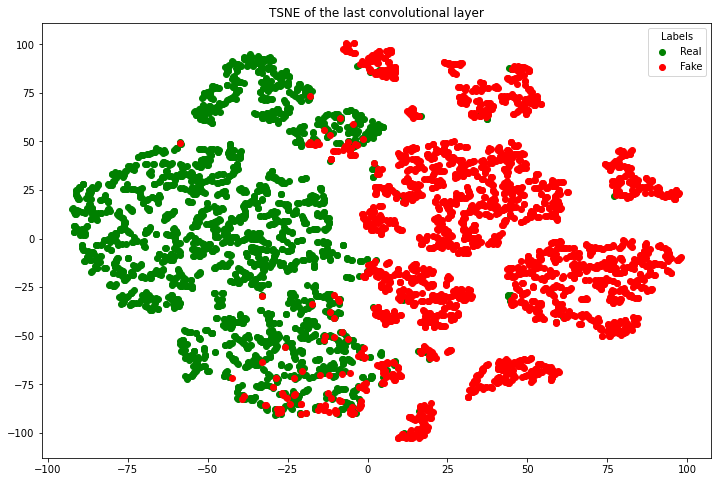

In [5]:
model.m_visualize_tsne_of_last_conv_layer(split='all')

In [6]:
sample_data = dataset_manager.get_random_train_samples(device=model.m_args.device)[0]
explainer = GNNModelExplainer(model, sample_data)

available idxs:  [271, 3681, 4887, 994, 1839, 3326, 4131, 5312, 519, 4408, 2001, 1866, 802, 1171, 4450, 530, 3386, 614, 1462, 1974, 2859, 3233, 916, 17, 2845, 3907, 3043, 417, 455, 4734, 4256, 1231, 2354, 2073, 3229, 4149, 3328, 4756, 3472, 4375, 2738, 3316, 577, 764, 216, 3158, 430, 609, 1762, 4438, 3542, 2248, 3105, 5284, 3536, 1450, 2424, 4232, 1652, 2639, 4710, 5095, 2923, 2174, 452, 3902, 3964, 671, 1985, 1964, 689, 3953, 3980, 5228, 66, 5272, 4536, 3540, 4592, 2893, 5016, 3500, 4116, 3152, 1960, 3097, 2225, 4003, 4657, 4129, 4874, 1782, 5340, 4412, 3335, 2270, 1689, 692, 4432, 2469, 3778, 3430, 626, 2445, 4823, 4651, 2751, 4238, 1846, 2077, 227, 3870, 1636, 2221, 2353, 4361, 5440, 454, 1748, 2956, 5089, 3994, 4543, 5289, 1279, 1236, 3937, 4808, 1915, 891, 1614, 815, 4883, 5185, 4961, 4511, 3104, 1077, 4073, 1800, 3745, 593, 92, 4655, 4287, 2547, 337, 185, 4789, 2203, 2679, 4713, 2523, 1183, 4044, 598, 2534, 2194, 2435, 116, 3739, 4719, 2870, 1137, 1646, 1345, 1850, 765, 5406, 292

Explain graph: 100%|██████████| 200/200 [00:00<00:00, 573.73it/s]


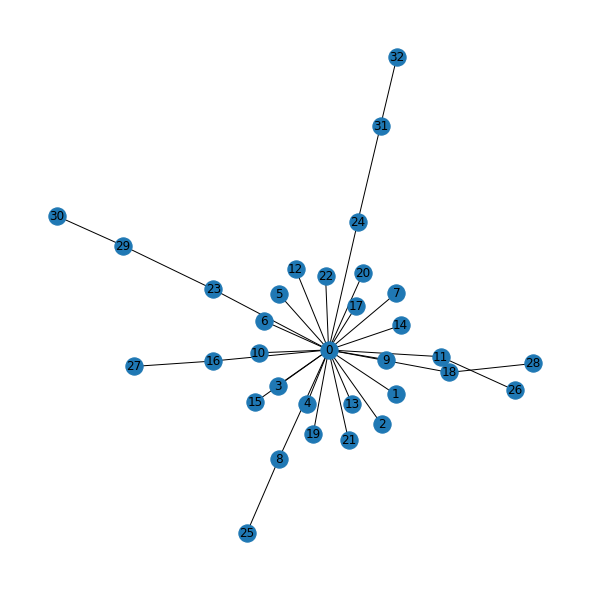

In [7]:
visualize_sample(sample_data[0])

y: Real
Removing edges with score less than 0.0912303775548935 with min torch.return_types.min(
values=tensor(0.0723),
indices=tensor(27)) and max torch.return_types.max(
values=tensor(0.9504),
indices=tensor(45))
 ############ Graph before dropping edges according to the edge mask ############
Number of nodes before dropping unimportant edges: 25


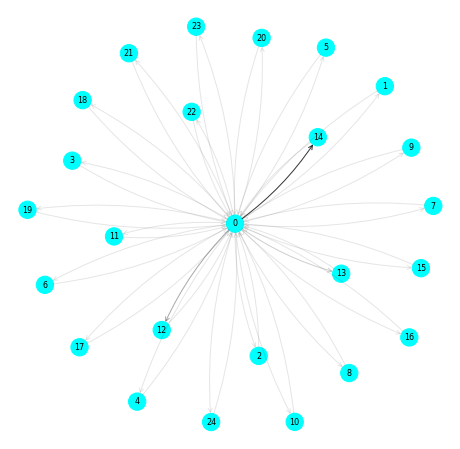

#################################################################################
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#################################################################################
 ############ Graph after dropping edges according to the edge mask ############
Dropping 49 edges out of 97
Number of nodes before dropping unimportant edges: 4


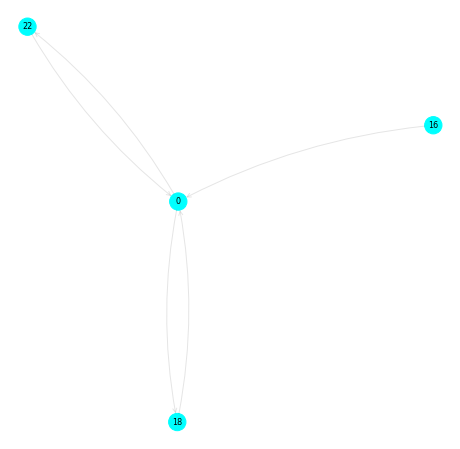

In [8]:
explainer.visualize_explaining_graph()

In [18]:
from torch_geometric.utils.convert import from_networkx
denoised_sample = from_networkx(explainer.subgraph)

In [20]:
model.eval()

GNNet(
  (conv1): SAGEConv(768, 128)
  (lin0): Linear(in_features=768, out_features=128, bias=True)
  (lin1): Linear(in_features=256, out_features=128, bias=True)
  (lin2): Linear(in_features=128, out_features=2, bias=True)
)

In [21]:
out, y = model.m_handle_train(sample_data)

In [22]:
out

tensor([[-2.3224, -0.1032]], device='cuda:0', grad_fn=<LogSoftmaxBackward0>)

In [23]:
y

tensor([1], device='cuda:0')

In [24]:
sample_data.y

tensor([1], device='cuda:0')

In [145]:
from pandas import read_csv, DataFrame
from matplotlib import pyplot as plt
import numpy as np
fake_news22_count = read_csv('/home/sersery/Downloads/scopus_fake_news22.csv').count()
fake_news21_count = read_csv('/home/sersery/Downloads/scopus_fake_news21.csv').count()
fake_news20_count = read_csv('/home/sersery/Downloads/scopus_fake_news20.csv').count()
fake_news_before_20_file = read_csv('/home/sersery/Downloads/scopus_fake_news_before_20.csv')

fake_newsbefore20_counts = fake_news_before_20_file['Year'].value_counts()

fake_news_detection_file_dir = '/home/sersery/Downloads/scopus_fake_news_detection.csv'
scopus_fake_news_detection = read_csv(fake_news_detection_file_dir)

In [146]:
scopus_fake_news_dict = {
    'Year': [2022, 2021, 2020],
    'Count': [fake_news22_count.Title, fake_news21_count.Title, fake_news20_count.Title]
}
scopus_fake_news_dict


{'Year': [2022, 2021, 2020], 'Count': [1131, 1809, 1383]}

In [147]:
for year, count in zip(fake_newsbefore20_counts.keys(), fake_newsbefore20_counts.values):
    if year >= 2015:
        scopus_fake_news_dict['Year'].append(year)
        scopus_fake_news_dict['Count'].append(count)
scopus_fake_news_df = DataFrame.from_dict(scopus_fake_news_dict)

In [148]:
scopus_fake_news_detection_dict = {'Year': [], 'Count': []}
for year, count in zip(scopus_fake_news_detection['Year'].value_counts().keys(), scopus_fake_news_detection['Year'].value_counts().values):
    if year == 2015 :
        scopus_fake_news_detection_dict['Year'].append(2016)
        scopus_fake_news_detection_dict['Count'].append(0)

    scopus_fake_news_detection_dict['Year'].append(year)
    scopus_fake_news_detection_dict['Count'].append(count)
scopus_fake_news_detection_df = DataFrame.from_dict(scopus_fake_news_detection_dict)

In [154]:
scopus_fake_news_df = scopus_fake_news_df.sort_values(by='Year')

In [155]:
scopus_fake_news_detection_df = scopus_fake_news_detection_df.sort_values(by='Year')

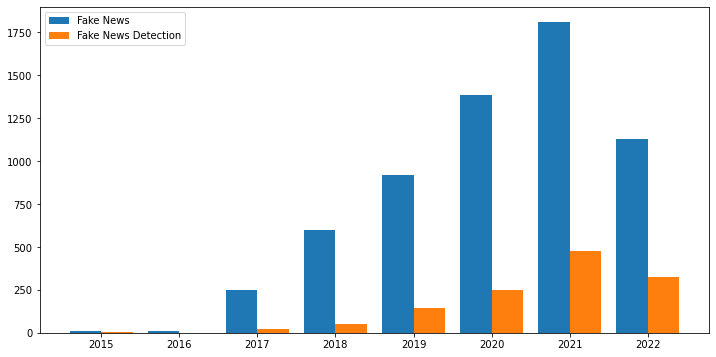

In [168]:

fig = plt.figure(figsize=(12, 6))
x_axis = np.arange(len(scopus_fake_news_df['Year']))
plt.bar(x_axis - 0.2, scopus_fake_news_df['Count'], label='Fake News', width=0.4)
plt.bar(x_axis + 0.2, scopus_fake_news_detection_df['Count'], label='Fake News Detection', width=0.4)
plt.xticks(x_axis, scopus_fake_news_df['Year'])
plt.axis('on')
plt.legend()
plt.savefig('FN_vs_FND_Publications.pdf', bbox_inches='tight')
plt.show()

<Figure size 432x288 with 0 Axes>

In [171]:
scopus_fake_news_detection_df.Count.sum()

1274